In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df = pd.read_csv('mail_data.csv').dropna()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.shape

(5572, 2)

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df.duplicated().sum()

415

In [7]:
df = df.drop_duplicates(keep = 'first')

In [8]:
df.duplicated().sum()

0

In [9]:
encoder = LabelEncoder()

In [10]:
df['Category'] = encoder.fit_transform(df['Category'])

C:\Users\Suman\AppData\Local\Temp\ipykernel_20708\1432867656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = encoder.fit_transform(df['Category'])


In [11]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


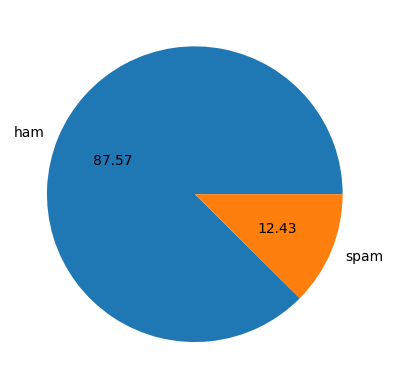

In [12]:
plt.pie(df['Category'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [13]:
X = df['Message']
y = df['Category']

In [14]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [15]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


In [18]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

In [19]:
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

Y_train = y_train.astype('int')
Y_test = y_test.astype('int')

In [20]:
X_train

4499    Latest Nokia Mobile or iPOD MP3 Player +£400 p...
3499    You said to me before i went back to bed that ...
836     Good Morning my Dear........... Have a great &...
5002    Nope. Since ayo travelled, he has forgotten hi...
2417      Could you not read me, my Love ? I answered you
                              ...                        
1216    that would be good … I'll phone you tomo lunch...
3655                     Why i come in between you people
1388    Hope ur head doesn't hurt 2 much ! Am ploughin...
4969    Future is not what we planned for tomorrow.......
1331                          Aight no rush, I'll ask jay
Name: Message, Length: 4125, dtype: object

In [21]:
print(X_train_feature)

  (0, 3911)	0.2317242547250461
  (0, 4659)	0.22500621380707309
  (0, 4413)	0.1838757073741166
  (0, 3628)	0.268219454353003
  (0, 4479)	0.27674229151344065
  (0, 5066)	0.2581986050405092
  (0, 484)	0.2946938046684661
  (0, 5297)	0.32969099214436687
  (0, 3182)	0.22379359088251452
  (0, 5537)	0.18304536132610877
  (0, 7264)	0.21163043726471042
  (0, 678)	0.28773013966340255
  (0, 4672)	0.32969099214436687
  (0, 544)	0.21077209970653749
  (0, 4498)	0.2946938046684661
  (1, 5696)	0.46306932872490303
  (1, 7218)	0.5002632786489883
  (1, 1260)	0.5524284081371184
  (1, 6028)	0.47971481393920035
  (2, 3105)	0.28313135550210616
  (2, 4460)	0.36073103792675854
  (2, 2141)	0.3498319483540509
  (2, 3154)	0.332165535557188
  (2, 943)	0.38970512739551255
  (2, 6379)	0.5636752450753132
  :	:
  (4122, 1862)	0.16379317636716983
  (4122, 7175)	0.1984904262993497
  (4122, 6747)	0.21123004041159005
  (4122, 3458)	0.25238586086853076
  (4122, 6265)	0.28169050207204244
  (4122, 3282)	0.25725187069353017
  

In [22]:
model = RandomForestClassifier()
# model = LogisticRegression()

In [23]:
model.fit(X_train_feature, Y_train)

RandomForestClassifier()

In [24]:
prediction_on_training_data = model.predict(X_train_feature)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [25]:
print("Accuracy on training data: ",accuracy_on_training_data)

Accuracy on training data:  1.0


In [26]:
prediction_on_test_data = model.predict(X_test_feature)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [27]:
print('accuracy on test data: ',accuracy_on_test_data)

accuracy on test data:  0.9786821705426356


In [28]:
input_data = ["FREE entry into our $500 cash prize contest. Text WIN to 12345 now!"]
input_data_features = feature_extraction.transform(input_data)
prediction = model.predict(input_data_features)

if prediction[0] == 1:
    print("spam")
else:
    print("Not Spam")

spam


# save the model

In [29]:
with open('model.pickle', 'wb') as file:
    pickle.dump((model, feature_extraction),file)

# open the model

In [30]:
with open('model.pickle', 'rb') as file:
    model, feature_extraction = pickle.load(file)

In [31]:
input_data = ["FREE entry into our $500 cash prize contest. Text WIN to 12345 now!"]
input_data_features = feature_extraction.transform(input_data)
prediction = model.predict(input_data_features)

if prediction[0] == 1:
    print("spam")
else:
    print("Not Spam")

spam
